In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_json('/content/drive/MyDrive/News_Category_Dataset_v2.json/News_Category_Dataset_v2.json',lines=True)

In [4]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [5]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [6]:
pd.unique(df['category'])

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


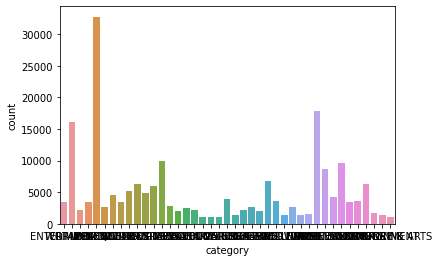

In [7]:
sns.countplot(df.category)

In [8]:
df['category'].nunique()

41

In [9]:
df = df.rename(columns={'headline': 'TITLE'})

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
# Headlines Tokenization

# Required Libraries
from nltk.tokenize import sent_tokenize, word_tokenize

TOKENIZED_TITLES = []

for headline in df['TITLE']:
    TOKENIZED_TITLES.append(word_tokenize(headline.lower()))

In [13]:
# Headlines have been tokenized
for title in TOKENIZED_TITLES[0:10]:
    print(title)

['there', 'were', '2', 'mass', 'shootings', 'in', 'texas', 'last', 'week', ',', 'but', 'only', '1', 'on', 'tv']
['will', 'smith', 'joins', 'diplo', 'and', 'nicky', 'jam', 'for', 'the', '2018', 'world', 'cup', "'s", 'official', 'song']
['hugh', 'grant', 'marries', 'for', 'the', 'first', 'time', 'at', 'age', '57']
['jim', 'carrey', 'blasts', "'castrato", "'", 'adam', 'schiff', 'and', 'democrats', 'in', 'new', 'artwork']
['julianna', 'margulies', 'uses', 'donald', 'trump', 'poop', 'bags', 'to', 'pick', 'up', 'after', 'her', 'dog']
['morgan', 'freeman', "'devastated", "'", 'that', 'sexual', 'harassment', 'claims', 'could', 'undermine', 'legacy']
['donald', 'trump', 'is', 'lovin', "'", 'new', 'mcdonald', "'s", 'jingle', 'in', "'tonight", 'show', "'", 'bit']
['what', 'to', 'watch', 'on', 'amazon', 'prime', 'that', '’', 's', 'new', 'this', 'week']
['mike', 'myers', 'reveals', 'he', "'d", "'like", 'to', "'", 'do', 'a', 'fourth', 'austin', 'powers', 'film']
['what', 'to', 'watch', 'on', 'hulu',

In [14]:
# Pickling TOKENIZED_TITLES

# Required Library
import pickle

file = "/content/drive/MyDrive/News_Category_Dataset_v2.json/Tokenized Titles.pkl"
fileobj = open(file, 'wb')
pickle.dump(TOKENIZED_TITLES, fileobj)
fileobj.close()

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# Removal of Stop Words & Punctuation
# Also removes 's

# Required Libraries
from nltk.corpus import stopwords
import string

# Stop Words for English Language
stop_words = set(stopwords.words("english"))
print("Stop Words : ")
print(stop_words)

# Punctuations
punctuations = set(string.punctuation)
print("\nPunctuations : ")
print(punctuations)

# FILTERED TITLE =  Title Without Stop Words & Punctuations
FILTERED_TITLES = []

for title in TOKENIZED_TITLES:
    temp_title = []
    for word in title:
        if((word not in stop_words) and (word not in punctuations) and (word != "'s")):
            temp_title.append(word)
            
    FILTERED_TITLES.append(temp_title)
        

print("\nFiltered Titles : ")
print(FILTERED_TITLES[0:5])

Stop Words : 
{"you're", 'should', 'they', 'couldn', "shouldn't", 'more', 'under', 'this', 'there', 're', "that'll", 'and', 'of', 'so', 'yourselves', 'himself', 'myself', 'because', 'i', 'a', 'is', 'most', 'wouldn', "you'll", "she's", 'once', 'again', 'd', 'me', "don't", 'had', 'the', 'did', 'from', 'on', 'any', 'at', 'whom', "doesn't", 'where', "you've", 'your', 'down', 'being', 'yours', "needn't", 'than', 'very', 'y', 'am', 'he', 'an', 'has', 'in', 'theirs', 'now', 'her', "aren't", 'own', 'hadn', 'off', "it's", 'don', "should've", "hasn't", 'not', 'no', "hadn't", "didn't", 'only', 'its', 'does', 'ourselves', "you'd", 'against', "haven't", 'were', 'his', 'too', 'aren', "couldn't", "wasn't", 'm', 'to', 'each', 'all', 'it', 'as', 'about', 'having', 'wasn', 'both', 'out', 'their', 'doesn', 'until', 'didn', 'between', 'other', 'some', 'won', 'been', 'weren', "wouldn't", 'o', 'here', 'we', 'isn', 'shan', 'ma', 'do', 'for', 'why', 'him', 'over', 'our', 'just', 'but', 'haven', 'hasn', 'what'

In [17]:
# Stemming using Porter Stemmer

# Required Library
from nltk.stem import PorterStemmer

porter = PorterStemmer()

STEMMED_TITLES_HEADLINES = []

for title in FILTERED_TITLES:
    temp_title = []
    for word in title:
        temp_title.append(porter.stem(word))
        
    STEMMED_TITLES_HEADLINES.append(" ".join(temp_title))
    
    
print("Stemmed Titles Headlines : ")
print(STEMMED_TITLES_HEADLINES[0:5])

Stemmed Titles Headlines : 
['2 mass shoot texa last week 1 tv', 'smith join diplo nicki jam 2018 world cup offici song', 'hugh grant marri first time age 57', "jim carrey blast 'castrato adam schiff democrat new artwork", 'julianna marguli use donald trump poop bag pick dog']


In [18]:
# Pickling STEMMED_TITLES_HEADLINES

# Library already imported
# import pickle

file = "/content/drive/MyDrive/News_Category_Dataset_v2.json/STEMMED_TITLES_HEADLINES.pkl"
fileobj = open(file, 'wb')
pickle.dump(STEMMED_TITLES_HEADLINES, fileobj)
fileobj.close()

In [19]:
df.head()

,category,TITLE,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [20]:
# Replacing HEADLINES with STEMMED_TITLES_HEADLINES
df = df.drop(['TITLE'], axis=1)
df.insert(0, "TITLE", STEMMED_TITLES_HEADLINES, True)
df.head()

,TITLE,category,authors,link,short_description,date
0,2 mass shoot texa last week 1 tv,CRIME,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,smith join diplo nicki jam 2018 world cup offi...,ENTERTAINMENT,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,hugh grant marri first time age 57,ENTERTAINMENT,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,jim carrey blast 'castrato adam schiff democra...,ENTERTAINMENT,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,julianna marguli use donald trump poop bag pic...,ENTERTAINMENT,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [21]:
# Encoding News Categories

# Required Library
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Adding Column of ENCODED CATEGORY
df.insert(2, "ENCODED_CATEGORY", labelencoder.fit_transform(df['category']), True)

# Business -> 0
# Health -> 1
# Entertainment -> 2
# Science & Technology -> 3

df.head()

,TITLE,category,ENCODED_CATEGORY,authors,link,short_description,date
0,2 mass shoot texa last week 1 tv,CRIME,6,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,smith join diplo nicki jam 2018 world cup offi...,ENTERTAINMENT,10,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,hugh grant marri first time age 57,ENTERTAINMENT,10,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,jim carrey blast 'castrato adam schiff democra...,ENTERTAINMENT,10,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,julianna marguli use donald trump poop bag pic...,ENTERTAINMENT,10,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [22]:
# Pickling DataFrame

# Library already imported
# import pickle

file = "/content/drive/MyDrive/News_Category_Dataset_v2.json/DATAFRAME.pkl"
fileobj = open(file, 'wb')
pickle.dump(df, fileobj)
fileobj.close()

In [23]:
# Loading DataFrame

# Required Library
import pickle

file = "/content/drive/MyDrive/News_Category_Dataset_v2.json/DATAFRAME.pkl"
fileobj = open(file, 'rb')
df = pickle.load(fileobj)
fileobj.close()

print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,TITLE,category,ENCODED_CATEGORY,authors,link,short_description,date
0,2 mass shoot texa last week 1 tv,CRIME,6,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,smith join diplo nicki jam 2018 world cup offi...,ENTERTAINMENT,10,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,hugh grant marri first time age 57,ENTERTAINMENT,10,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,jim carrey blast 'castrato adam schiff democra...,ENTERTAINMENT,10,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,julianna marguli use donald trump poop bag pic...,ENTERTAINMENT,10,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [24]:
df1 = df.iloc[:, 1:2] 
df1 = df[['category', 'ENCODED_CATEGORY']]

In [25]:
df1

,category,ENCODED_CATEGORY
0,CRIME,6
1,ENTERTAINMENT,10
2,ENTERTAINMENT,10
3,ENTERTAINMENT,10
4,ENTERTAINMENT,10
...,...,...
200848,TECH,32
200849,SPORTS,28
200850,SPORTS,28
200851,SPORTS,28


In [26]:
df1.to_csv("cat")

In [27]:
# News Headlines
X = df['TITLE']

# Encoded News Category
y = df['ENCODED_CATEGORY']

In [28]:
# Splitting the dataset into Training set & Testing set

# Required Library
from sklearn.model_selection import train_test_split

# Testing_set = 25%  and  Training_set = 75%
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 51)

In [29]:
print("Shape of X : " + str(X.shape))
print("Shape of y : " + str(y.shape))

print("\n")
print("Shape of X_train : " + str(X_train.shape))
print("Shape of y_train : " + str(y_train.shape))
print("Shape of X_test  : " + str(X_test.shape))
print("Shape of y_test  : " + str(y_test.shape))

Shape of X : (200853,)
Shape of y : (200853,)


Shape of X_train : (150639,)
Shape of y_train : (150639,)
Shape of X_test  : (50214,)
Shape of y_test  : (50214,)


In [30]:
# Feature Extraction

# Required Library
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting & Tranforming Training Data (X_train)
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train.values)

# Tranforming Testing Data (X_test)
tfidf_X_test = tfidf_vectorizer.transform(X_test.values)

# Saving tfidf_vectorizer
pickle.dump(tfidf_vectorizer, open("/content/drive/MyDrive/News_Category_Dataset_v2.json/tfidf_vectorizer.pkl","wb"))

In [31]:
# Multinomial Naive Bayes Classifier

# Required Library
from sklearn.naive_bayes import MultinomialNB

# Instantiating Naive Bayes Classifier with alpha = 1.0
nb_classifier = MultinomialNB()

# Fitting nb_classifier to Training Data
nb_classifier.fit(tfidf_X_train, y_train)

# Saving nb_classifier for tfidf_vectorizer
pickle.dump(nb_classifier, open("/content/drive/MyDrive/News_Category_Dataset_v2.json/nb_classifier_for_tfidf_vectorizer.pkl", "wb"))

In [32]:
# Prediction
pred = nb_classifier.predict(tfidf_X_test)

In [33]:
# Accuracy Score & Confusion Matrix

# Required Library
from sklearn import metrics

print("Multinomial Naive Bayes : (TF-IDF Approach) \n")

# Accuracy
a_score = metrics.accuracy_score(y_test, pred)
print("Accuracy : " + str("{:.2f}".format(a_score*100)),'%')

print("\n")

# Confusion Matrix
# Labels : 0(Business), 1(Entertainment), 2(Health), 3(Science & Technology)
# By defualt, Horizontally, Labels are from 0 to 3
# By defualt, Vertically,   Labels are from 0 to 3
confusion_matrix = metrics.confusion_matrix(y_test, pred)

print("Confusion Matrix :")
print(confusion_matrix)

Multinomial Naive Bayes : (TF-IDF Approach) 

Accuracy : 41.29 %


Confusion Matrix :
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 33  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  1  0]]


In [34]:
import numpy as np

In [35]:
# Laplace Smoothing (Tunning parameter - alpha)

# List of alphas
alphas = np.arange(0,1,0.1)

# Function for training nb_classifier with different alpha values
def train_and_predict(alpha):
    
    # Instantiating Naive Bayes Classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    
    # Fitting nb_classifier to Training Data
    nb_classifier.fit(tfidf_X_train, y_train)
    
    # Prediction
    pred = nb_classifier.predict(tfidf_X_test)
    
    # Accuracy Score
    a_score = metrics.accuracy_score(y_test, pred)
    
    return a_score


# Iterating over alphas & printing the corresponding Accuracy Score
for alpha in alphas:
    print("Alpha : ", alpha)
    print("Accuracy Score : ", train_and_predict(alpha))
    print()

Alpha :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy Score :  0.49285059943442067

Alpha :  0.1
Accuracy Score :  0.5214880312263512

Alpha :  0.2
Accuracy Score :  0.499302983231768

Alpha :  0.30000000000000004
Accuracy Score :  0.4813996096706098

Alpha :  0.4
Accuracy Score :  0.4655673716493408

Alpha :  0.5
Accuracy Score :  0.45337953558768473

Alpha :  0.6000000000000001
Accuracy Score :  0.44306368741785157

Alpha :  0.7000000000000001
Accuracy Score :  0.43394272513641613

Alpha :  0.8
Accuracy Score :  0.4255785239176325

Alpha :  0.9
Accuracy Score :  0.4185685267056996



In [36]:
# Feature Extraction

# Required Library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating CountVectorizer
count_vectorizer = CountVectorizer()

# Fitting & Tranforming Training Data (X_train)
count_X_train = count_vectorizer.fit_transform(X_train.values)

# Tranforming Testing Data (X_test)
count_X_test = count_vectorizer.transform(X_test.values)

# Saving count_vectorizer
pickle.dump(count_vectorizer, open("/content/drive/MyDrive/News_Category_Dataset_v2.json/count_vectorizer.pkl","wb"))

In [37]:
# Multinomial Naive Bayes Classifier

# Required Library
from sklearn.naive_bayes import MultinomialNB

# Instantiating Naive Bayes Classifier with alpha = 1.0
nb_classifier = MultinomialNB()

# Fitting nb_classifier to Training Data
nb_classifier.fit(count_X_train, y_train)

# Saving nb_classifier for count_vectorizer
pickle.dump(nb_classifier, open("/content/drive/MyDrive/News_Category_Dataset_v2.json/nb_classifier_for_count_vectorizer.pkl", "wb"))

In [38]:
# Prediction
pred = nb_classifier.predict(count_X_test)

In [39]:
# Accuracy Score & Confusion Matrix

# Required Library
from sklearn import metrics

print("Multinomial Naive Bayes : (BOW Approach) \n")

# Accuracy
a_score = metrics.accuracy_score(y_test, pred)
print("Accuracy : " + str("{:.2f}".format(a_score*100)),'%')

print("\n")

# Confusion Matrix
# Labels : 0(Business), 1(Entertainment), 2(Health), 3(Science & Technology)
# By defualt, Horizontally, Labels are from 0 to 3
# By defualt, Vertically,   Labels are from 0 to 3
confusion_matrix = metrics.confusion_matrix(y_test, pred)

print("Confusion Matrix :")
print(confusion_matrix)

Multinomial Naive Bayes : (BOW Approach) 

Accuracy : 52.42 %


Confusion Matrix :
[[ 12   5   6 ...   0   0   0]
 [  1   3   5 ...   7   0   0]
 [  0   0 243 ...   4   0   0]
 ...
 [  0   0   9 ... 106   0   1]
 [  0   0   1 ...   0  32   5]
 [  0   0   5 ...   2   4  50]]


In [40]:
# Laplace Smoothing (Tunning parameter - alpha)

# List of alphas
alphas = np.arange(0,1,0.1)

# Function for training nb_classifier with different alpha values
def train_and_predict(alpha):
    
    # Instantiating Naive Bayes Classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    
    # Fitting nb_classifier to Training Data
    nb_classifier.fit(count_X_train, y_train)
    
    # Prediction
    pred = nb_classifier.predict(count_X_test)
    
    # Accuracy Score
    a_score = metrics.accuracy_score(y_test, pred)
    
    return a_score


# Iterating over alphas & printing the corresponding Accuracy Score
for alpha in alphas:
    print("Alpha : ", alpha)
    print("Accuracy Score : ", train_and_predict(alpha))
    print()

Alpha :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy Score :  0.49354761620265264

Alpha :  0.1
Accuracy Score :  0.5536702911538615

Alpha :  0.2
Accuracy Score :  0.5563587844027562

Alpha :  0.30000000000000004
Accuracy Score :  0.5555821085752978

Alpha :  0.4
Accuracy Score :  0.5529732743856295

Alpha :  0.5
Accuracy Score :  0.5486517704225913

Alpha :  0.6000000000000001
Accuracy Score :  0.5444298402835862

Alpha :  0.7000000000000001
Accuracy Score :  0.5396702114948022

Alpha :  0.8
Accuracy Score :  0.5347313498227586

Alpha :  0.9
Accuracy Score :  0.5291153861472896



In [41]:
# Prediction of User News Headline

# Loading Model
count_vectorizer = pickle.load(open("/content/drive/MyDrive/News_Category_Dataset_v2.json/count_vectorizer.pkl","rb"))
nb_classifier = pickle.load(open("/content/drive/MyDrive/News_Category_Dataset_v2.json/nb_classifier_for_count_vectorizer.pkl","rb"))

In [42]:
# Values encoded by LabelEncoder
encoded = {1:'Arts&Culture' ,2:'BlackVoices',3:'Business',4:'College',5:'Comedy',6:'Crime',7:'Culture&Arts',8:'Divorce',9:'Education',10:'Entertainment',11:'Envirohmnemt',12:'fifty',13:'Food&Drink',14:'GoodNews',15:'Green',16:'Health and Living',17:'Home&Living',18:'Impact',19:'LatinoVOice',20:'Media',21:'Money',22:'Parenting',23:'Parents',24:'Politcs',25:'Queervoices',26:'Arts',27:'Science',28:'Sports',29:'Style',30:'Style&Beauty',31:'Taste',32:'Tech',33:'TheWorldPost',34:'Travel',35:'Weddings',36:'Weird_news',37:'Wellness',38:'Women',39:'WorldNews'}

# Input
user_headline = [input("News Headline : ")]

# Transformation & Prediction of User Headline
headline_counts = count_vectorizer.transform(user_headline)
prediction = nb_classifier.predict(headline_counts)

print("News Category : ", encoded[prediction[0]])

News Headline : Racism againest black should be ended
News Category :  BlackVoices
